<a href="https://colab.research.google.com/github/KrunalVaghela62/newww/blob/main/Copy_of_01_pytorch_workflow_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01. PyTorch Workflow Exercise Template

The following is a template for the PyTorch workflow exercises.

It's only starter code and it's your job to fill in the blanks.

Because of the flexibility of PyTorch, there may be more than one way to answer the question.

Don't worry about trying to be *right* just try writing code that suffices the question.

You can see one form of [solutions on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions) (but try the exercises below yourself first!).

In [1]:
# Import necessary libraries
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path


In [2]:
# Setup device-agnostic code
device="cuda" if torch.cuda.is_available() else "cpu"
print(f"using :{device}")

using :cpu


## 1. Create a straight line dataset using the linear regression formula (`weight * X + bias`).
  * Set `weight=0.3` and `bias=0.9` there should be at least 100 datapoints total.
  * Split the data into 80% training, 20% testing.
  * Plot the training and testing data so it becomes visual.

Your output of the below cell should look something like:
```
Number of X samples: 100
Number of y samples: 100
First 10 X & y samples:
X: tensor([0.0000, 0.0100, 0.0200, 0.0300, 0.0400, 0.0500, 0.0600, 0.0700, 0.0800,
        0.0900])
y: tensor([0.9000, 0.9030, 0.9060, 0.9090, 0.9120, 0.9150, 0.9180, 0.9210, 0.9240,
        0.9270])
```

Of course the numbers in `X` and `y` may be different but ideally they're created using the linear regression formula.

In [3]:

# Create the data parameters
weigth=0.3
bias=0.9
# Make X and y using linear regression feature
step=0.01
lower_limit=0.0
upper_limit=1.0
X=torch.arange(lower_limit,upper_limit,step,dtype=torch.float)
y=weigth*X+bias

print(f"Number of X samples: {len(X)}")
print(f"Number of y samples: {len(y)}")
print(f"First 10 X & y samples:\nX: {X[:10]}\ny: {y[:10]}")

Number of X samples: 100
Number of y samples: 100
First 10 X & y samples:
X: tensor([0.0000, 0.0100, 0.0200, 0.0300, 0.0400, 0.0500, 0.0600, 0.0700, 0.0800,
        0.0900])
y: tensor([0.9000, 0.9030, 0.9060, 0.9090, 0.9120, 0.9150, 0.9180, 0.9210, 0.9240,
        0.9270])


In [4]:
# Split the data into training and testing
training_split=int(0.8*len(X))
x_train=X[:training_split]
y_train=y[:training_split]
x_test=X[training_split:]
y_test=y[training_split:]



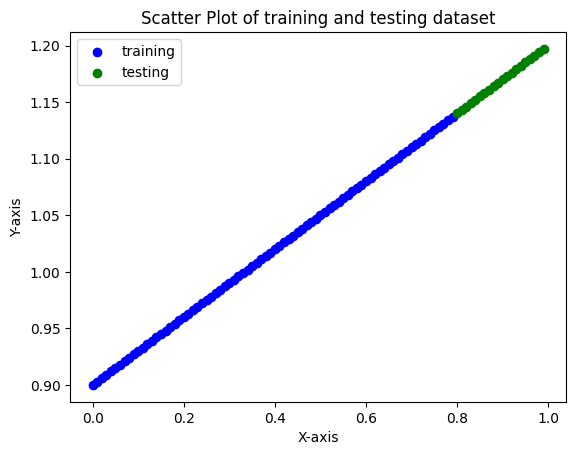

In [5]:
# Plot the training and testing data
plt.scatter(x_train, y_train, color='blue', label='training')

# Create a scatter plot for (x_test, y_test) in green
plt.scatter(x_test, y_test, color='green', label='testing')

# Add labels, title, and legend
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot of training and testing dataset')
plt.legend()

# Show the plot
plt.show()



## 2. Build a PyTorch model by subclassing `nn.Module`.
  * Inside should be a randomly initialized `nn.Parameter()` with `requires_grad=True`, one for `weights` and one for `bias`.
  * Implement the `forward()` method to compute the linear regression function you used to create the dataset in 1.
  * Once you've constructed the model, make an instance of it and check its `state_dict()`.
  * **Note:** If you'd like to use `nn.Linear()` instead of `nn.Parameter()` you can.

In [6]:
# Create PyTorch linear regression model by subclassing nn.Module
class LinerRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights=nn.Parameter(torch.randn(1,dtype=torch.float),requires_grad=True)
        self.bias=nn.Parameter(torch.randn(1,dtype=torch.float),requires_grad=True)
    def forward(self,x:torch.tensor)->torch.tensor:
        return  self.weights*x+self.bias


In [7]:
# Instantiate the model and put it to the target device
torch.manual_seed(50)
model=LinerRegressionModel()
list(model.parameters())


[Parameter containing:
 tensor([0.4625], requires_grad=True),
 Parameter containing:
 tensor([-0.1692], requires_grad=True)]

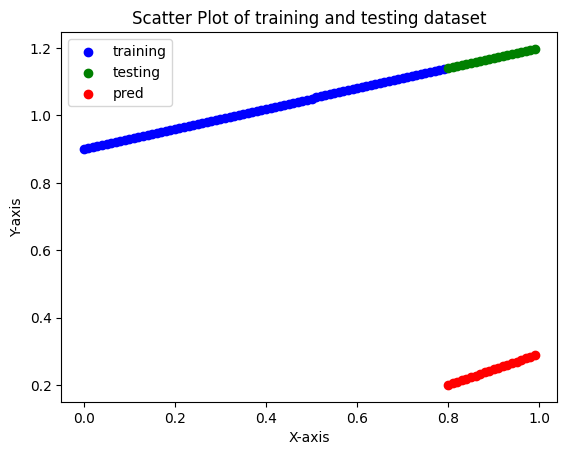

In [8]:
with torch.inference_mode():
    y_pred=model.forward(x_test)
# Plot the training and testing data
plt.scatter(x_train, y_train, color='blue', label='training')

# Create a scatter plot for (x_test, y_test) in green
plt.scatter(x_test, y_test, color='green', label='testing')
plt.scatter(x_test, y_pred, color='red', label='pred')

# Add labels, title, and legend
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot of training and testing dataset')
plt.legend()

# Show the plot
plt.show()



In [9]:
# Create the loss function and optimizer
loss_fn=nn.L1Loss()
optimiser=torch.optim.SGD(model.parameters(), 0.01)


## 3. Create a loss function and optimizer using `nn.L1Loss()` and `torch.optim.SGD(params, lr)` respectively.
  * Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.
  * Write a training loop to perform the appropriate training steps for 300 epochs.
  * The training loop should test the model on the test dataset every 20 epochs.

In [14]:
# Training loop


# Train model for 300 epochs
epochs=300

# Send data to target device


for epoch in range(epochs):
  ### Training


  # Put model in train mode
  model.train()


  # 1. Forward pass
  y_learn=model.forward(x_train)


  # 2. Calculate loss
  loss=loss_fn(y_learn,y_train)


  # 3. Zero gradients
  optimiser.zero_grad()#we are initialising all the entries in gradient matrix of cost function to zero.Our target is to find gradient of cost funtion,
                      #because gradient shows the direction in which if we move we get function's value most rapidly increasing, so if we move in -gradient direction
                      #we get the direction in which we descent the fastest(like a ball released in irregular valley finds its way on its own such that it reaches fast to lowest of valley
                      #where potential energy is minimum).



  # 4. Backpropagation
  loss.backward()#backpropagation is an algorithm which reduces complexity of finding gradient and "all the error values (del) for each neuron is calculated in backward order"
                  #hence it is called backpropagation.

  # 5. Step the optimizer
  optimiser.step()#using backpropagation we found all the gradient values and using this command we update all the entries in gradient matrix of loss function.
                  #using all these entries we move in specific direction on cost curve to reach lowest point on curve.from there we extract value of parameteres corresponding to this
                  #lowest point.with each iteration of epoch loop we are descending on cost curve by each step equal to learning rate hence if we choose high value of lr the
                  #rolling ball might not stop at minima, instead it rolls up on the hill again.While if we use smaller learning rate it increases computational complextity.



    # Put model in evaluation mode and setup inference context
  model.eval()

      # 1. Forward pass
  with torch.inference_mode():
    y_pred=model.forward(x_test)
  #calculate loss
    test_loss=loss_fn(y_pred, y_test.type(torch.float))
    ### Perform testing every 20 epochs
    if epoch % 20 == 0:
      # Print out what's happening
      print(f"Epoch: {epoch} | Train loss: {loss:.3f} | Test loss: {test_loss:.3f}")

Epoch: 0 | Train loss: 0.025 | Test loss: 0.059
Epoch: 20 | Train loss: 0.018 | Test loss: 0.043
Epoch: 40 | Train loss: 0.012 | Test loss: 0.027
Epoch: 60 | Train loss: 0.005 | Test loss: 0.010
Epoch: 80 | Train loss: 0.006 | Test loss: 0.010
Epoch: 100 | Train loss: 0.006 | Test loss: 0.010
Epoch: 120 | Train loss: 0.006 | Test loss: 0.010
Epoch: 140 | Train loss: 0.006 | Test loss: 0.010
Epoch: 160 | Train loss: 0.006 | Test loss: 0.010
Epoch: 180 | Train loss: 0.006 | Test loss: 0.010
Epoch: 200 | Train loss: 0.006 | Test loss: 0.010
Epoch: 220 | Train loss: 0.006 | Test loss: 0.010
Epoch: 240 | Train loss: 0.006 | Test loss: 0.010
Epoch: 260 | Train loss: 0.006 | Test loss: 0.010
Epoch: 280 | Train loss: 0.006 | Test loss: 0.010


## 4. Make predictions with the trained model on the test data.
  * Visualize these predictions against the original training and testing data (**note:** you may need to make sure the predictions are *not* on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).

In [15]:
# Make predictions with the model
print(y_pred)

tensor([1.1357, 1.1387, 1.1417, 1.1448, 1.1478, 1.1508, 1.1539, 1.1569, 1.1600,
        1.1630, 1.1660, 1.1691, 1.1721, 1.1751, 1.1782, 1.1812, 1.1842, 1.1873,
        1.1903, 1.1934])


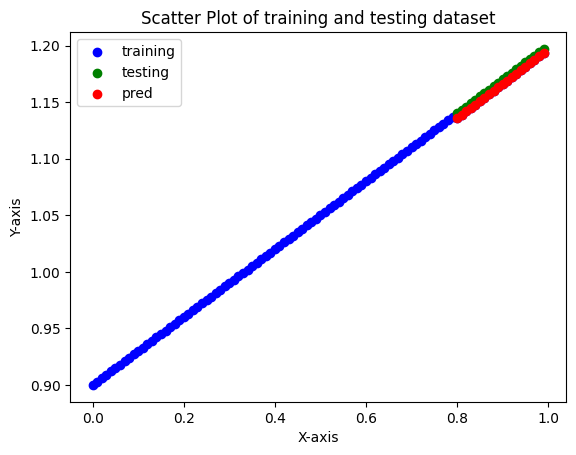

In [16]:
# Plot the predictions (these may need to be on a specific device)
plt.scatter(x_test,y_pred,color="blue")
plt.scatter(x_train, y_train, color='blue', label='training')

# Create a scatter plot for (x_test, y_test) in green
plt.scatter(x_test, y_test, color='green', label='testing')
plt.scatter(x_test, y_pred, color='red', label='pred')

# Add labels, title, and legend
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot of training and testing dataset')
plt.legend()

# Show the plot
plt.show()



## 5. Save your trained model's `state_dict()` to file.
  * Create a new instance of your model class you made in 2. and load in the `state_dict()` you just saved to it.
  * Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.

In [18]:
from pathlib import Path
# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/model.pth


In [20]:
# Create new instance of model and load saved state dict (make sure to put it on the target device)

# Instantiate a new instance of our model (this will be instantiated with random weights)
loaded_model_0 = LinerRegressionModel()

# Load the state_dict of our saved model (this will update the new instance of our model with trained weights)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<ipython-input-20-ea32b41831cc>:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


<All keys matched successfully>

In [22]:
# Make predictions with loaded model and compare them to the previous
# 1. Put the loaded model into evaluation mode
loaded_model_0.eval()

# 2. Use the inference mode context manager to make predictions
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(x_test)


In [25]:
# Compare previous model predictions with loaded model predictions (these should be the same)
y_pred== loaded_model_preds

tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True])